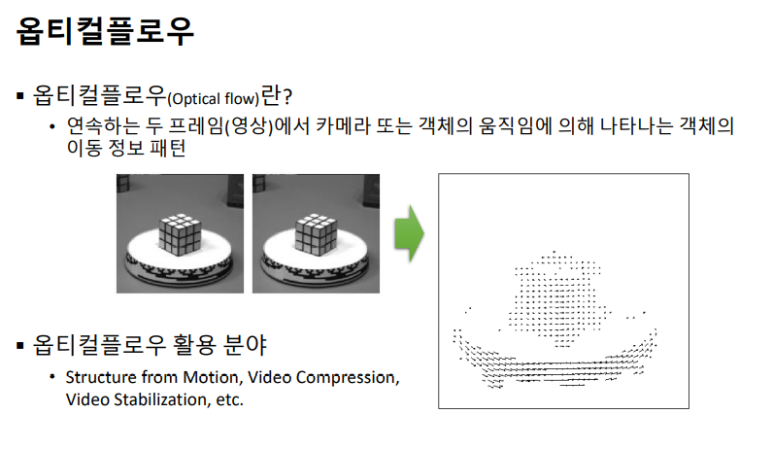

동영상에서 움직임을 검출합니다. 이전 프레임과 현재프레임에서 특정 위치의 픽셀이 어느 위치로 이동했는지, 프로그램을 통해 손떨림 보정으로도 응용할 수 있겠습니다.

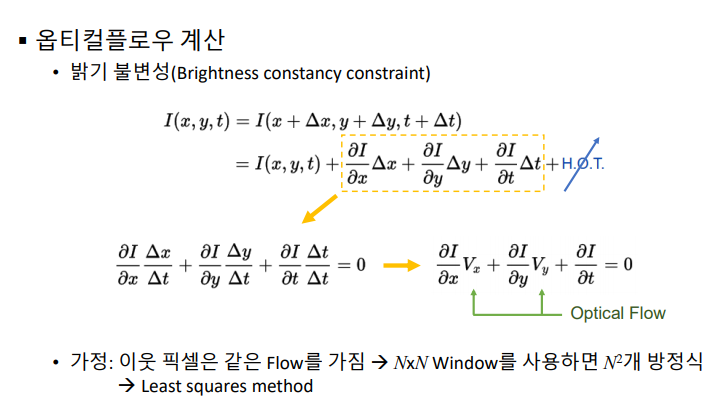

이미지의 x,y,t의 3차원으로(시간포함) 표현합니다. 시간이 델타t만큼 작은시간이 지나면, 어느 픽셀이 다른 위치로 이동한다면, 그 위치의 밝기는 변하지 않는다고 가정합니다. 얼마큼 어디로 어떻게 이동했다를 계산합니다. 테일러급수로, 무한대까지 미분해서 미분함수들의 조합을 해서 원래 함수를 표현하는 방식이죠. Hith Order Term=H.O.T은 0으로 무시해 줍니다. 미분한 값이 0이 되어야 식을 만족합니다.

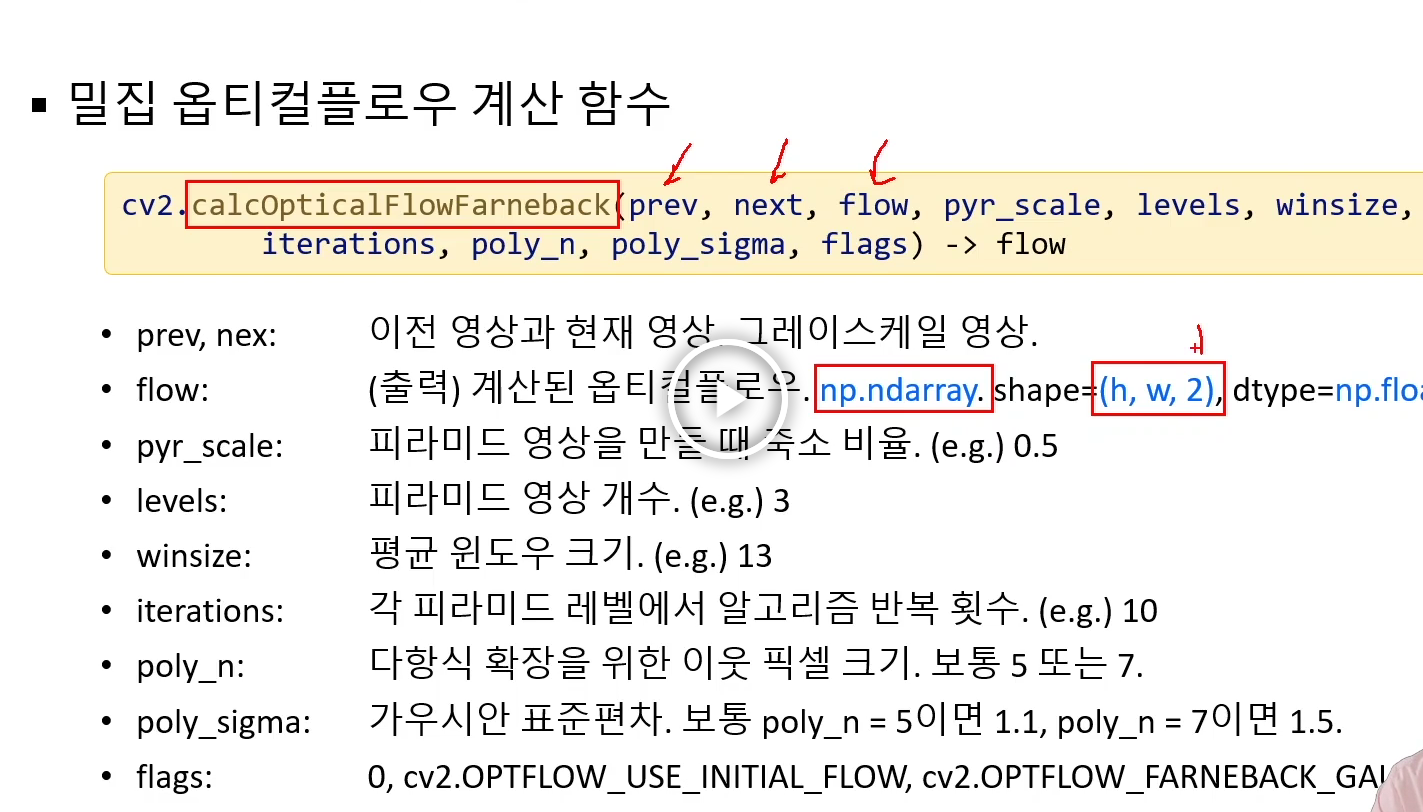


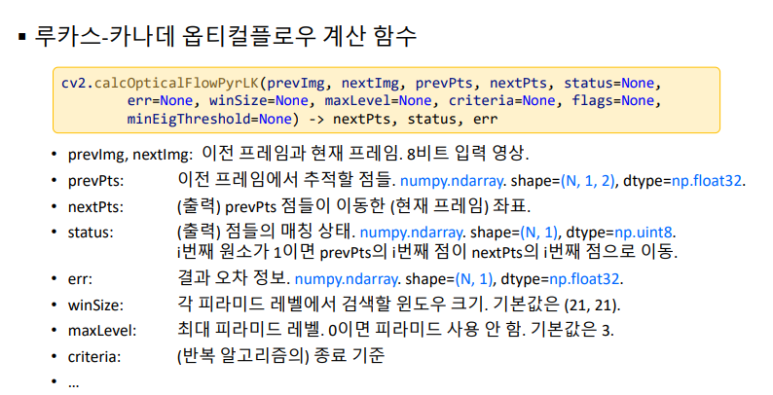
1. 이전프레임 영상
2. 현재 프레임 영상
3. 추적을 하고싶은 이전 프레임점들의 좌표를 ndarray로 주어야하며 N,1,2로 받습니다. 점의 개수는 N개, 2는 x,y 좌표이며 1은 더미가 되겠습니다.
4. 출력위치는 None을 줍니다. 출력으로 nestPts를 받는 것이죠.

In [37]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [38]:
src1 = cv2.imread('jh1.jpg')

src2 = cv2.imread('jh2.jpg')

if src1 is None or src2 is None:

    print('Image load failed!')

    sys.exit()


그레이 스케일로 변환해 줍니다.

In [39]:
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)

코너점을 찾는 함수로 입력을 그레이로만 받을 수 있습니다. 이거를 아래의 옵티컬 플러우 계산함수의 인풋으로 넣어줘야 합니다.

In [40]:
pt1 = cv2.goodFeaturesToTrack(gray1, 50, 0.01, 10)

여기선 src1,src2 컬러영상을 그대로 사용했습니다.(컬러의 경우 비록 계산시간이 오래걸리더라도 Flow를 찾는데 좀더 잘 나오는 경우가 있기 때문입니다.    
여기서 이 두장의 움직임 정보를 찾아내고, pt1(이전프레임)에 들어있는 좌표가 어디로 이동했는지 pt2로 출력을 받아냅니다. 현재 함수 인자의 pt2자리는 None으로 주고 출력으로 받습니다.

In [41]:
pt2, status, err = cv2.calcOpticalFlowPyrLK(src1, src2, pt1, None)

이미지 합성을 위해 각각 가중치를 반씩 둡니다.

In [42]:
dst = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)

In [43]:
for i in range(pt2.shape[0]):

    if status[i, 0] == 0:

        continue

#0은 무시한다는뜻. 잘못찾은건 무시하고 잘찾은것만 추출해준다. 그냥 넣어주는게 좋다.

 

    cv2.circle(dst, tuple(pt1[i, 0]), 4, (0, 255, 255), 2, cv2.LINE_AA)

    cv2.circle(dst, tuple(pt2[i, 0]), 4, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.arrowedLine(dst, tuple(pt1[i, 0]), tuple(pt2[i, 0]), (0, 255, 0), 2)
    #이어주는 화살표
    
cv2.namedWindow('dst',cv2.WINDOW_NORMAL)
cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

<ipython-input-43-2d48d11801ec>:11: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(dst, tuple(pt1[i, 0]), 4, (0, 255, 255), 2, cv2.LINE_AA)
<ipython-input-43-2d48d11801ec>:13: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(dst, tuple(pt2[i, 0]), 4, (0, 0, 255), 2, cv2.LINE_AA)
<ipython-input-43-2d48d11801ec>:15: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.arrowedLine(dst, tuple(pt1[i, 0]), tuple(pt2[i, 0]), (0, 255, 0), 2)


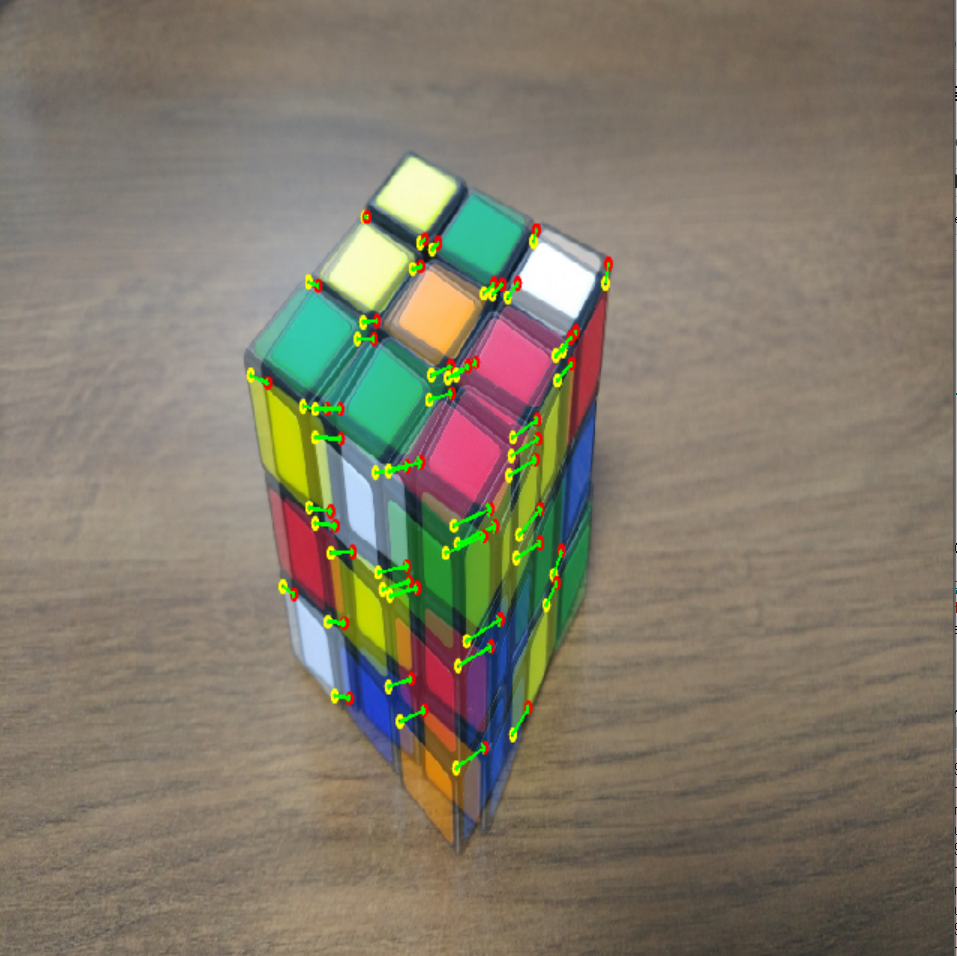